In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [324]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [216]:
# Function

def mix_max_scale(data):
    old_min = np.min(data)
    old_max = np.max(data)
    new_min = -1
    new_max = 1
    return new_min + (data - old_min) * (new_max - new_min) / (old_max - old_min)

In [338]:
data_path = '/Users/davidchemaly/Data/DSS2_Survey/A3D_Catalogue/fits_r_fov10Re/'
galaxy = 'IC0065.fits'
# galaxy = 'NGC1087.fits'
galaxy = 'NGC0473.fits'
galaxy = 'NGC0488.fits'
galaxy = 'NGC2698.fits'
galaxy = 'NGC3941.fits'
galaxy = 'NGC4440.fits'
galaxy = 'NGC5701.fits'
galaxy = 'NGC3073.fits'
galaxy = 'NGC3055.fits'
# galaxy = 'NGC3044.fits'
galaxy = 'NGC2712.fits'


M81 = '/Users/davidchemaly/Downloads/M81.fits'
all = data_path + galaxy
with fits.open(all) as hdul:
    data   = hdul[0].data
    header = hdul[0].header

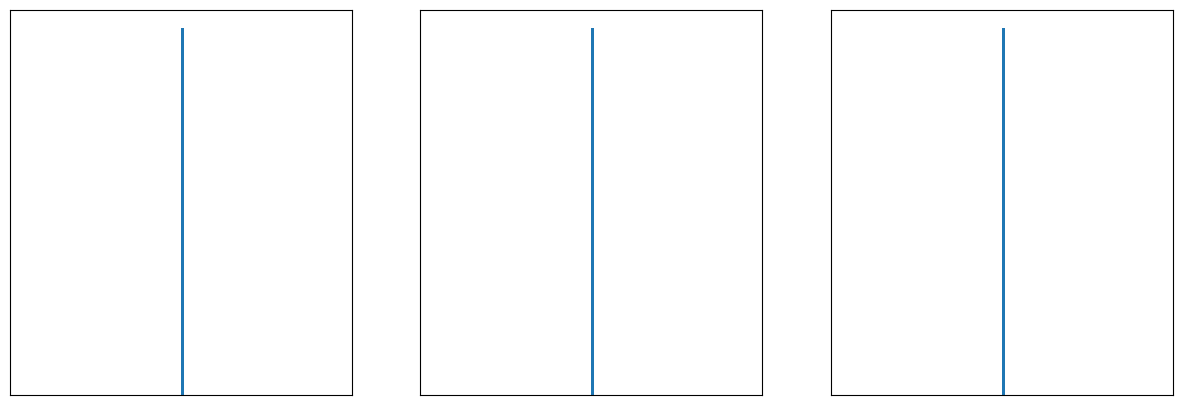

In [339]:
im = data
arcsinh_im = np.arcsinh(im + im.mean())

c = 2
p1 = np.percentile(arcsinh_im, c)
p2 = np.percentile(arcsinh_im, 100)
clipped_arcsinh_im = np.clip(arcsinh_im, p1, p2)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(im.flatten(), bins=100);
plt.subplot(1,3,2)
plt.hist(arcsinh_im.flatten(), bins=100);
plt.subplot(1,3,3)
plt.hist(clipped_arcsinh_im.flatten(), bins=100);

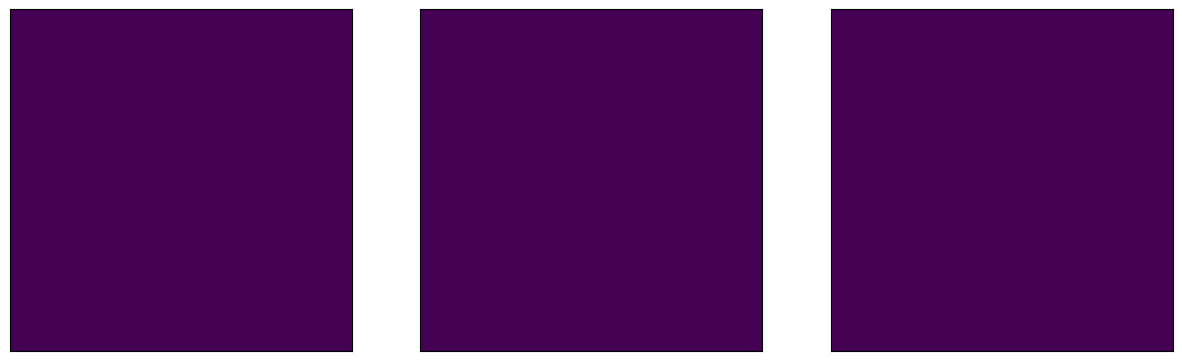

In [340]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(arcsinh_im)
plt.subplot(1,3,3)
plt.imshow(clipped_arcsinh_im)

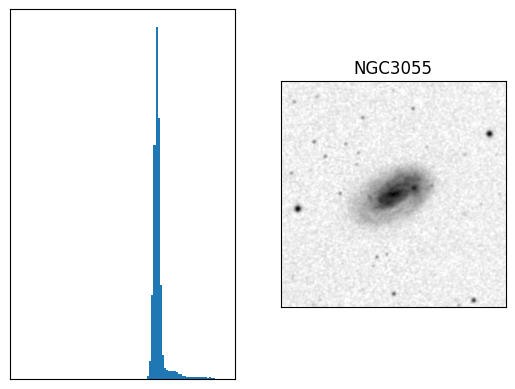

In [337]:
plt.subplot(1,2,1)
plt.hist(arcsinh_im.flatten(), bins=100);
plt.subplot(1,2,2)
plt.title(galaxy.split('.')[0])
plt.imshow(clipped_arcsinh_im, cmap='gray_r')